In [ ]:
# Install required libraries
!pip install h2o tensorflow opencv-python-headless yfinance gym stable-baselines3
!apt-get install -y python3-opencv

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 53.5 MB/s eta 0:00:00
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=869c1a23ac7413703daab57bbd2895295a560732c13e57a3c4074d6da592801b
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-pytest
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,272 kB of archives.
After this operation, 27.1 MB of ad

In [ ]:
import os

# Paths for chart images stored in Google Drive
base_path = '/content/drive/MyDrive/candeldata'
os.makedirs(base_path + '1min', exist_ok=True)
os.makedirs(base_path + '5min', exist_ok=True)
os.makedirs(base_path + '15min', exist_ok=True)

# Check files in Google Drive
os.listdir(base_path)


['1min', '.ipynb_checkpoints', '15min', '5min']

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

IMG_SIZE = (128, 128)

def create_cnn(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    output = Dense(3, activation='softmax')(x)

    return Model(inputs=base_model.input, outputs=output)

input_shape = (128, 128, 3)
model_1min = create_cnn(input_shape)
model_5min = create_cnn(input_shape)
model_15min = create_cnn(input_shape)

model_1min.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,763,779 (60.13 MB)

 Trainable params: 1,049,091 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base path to your dataset
base_path = '/content/drive/MyDrive/candeldata/'

# Create dummy subfolder and move images into it
for interval in ['1min', '5min', '15min']:
    class_a_dir = os.path.join(base_path, interval, 'classA')  # Create a 'classA' folder
    os.makedirs(class_a_dir, exist_ok=True)

    # Move all images from the main folder into 'classA'
    for filename in os.listdir(os.path.join(base_path, interval)):
        if filename.endswith('.png'):  # Ensure we're moving only PNG images
            file_path = os.path.join(base_path, interval, filename)
            shutil.move(file_path, class_a_dir)

# --- Step 4: Image Preprocessing and Data Loading ---

# Define image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load 1min images
train_gen_1min = datagen.flow_from_directory(
    base_path + '1min',  # Path to the '1min' folder
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Since we're treating all images as belonging to one class
    subset='training'
)
val_gen_1min = datagen.flow_from_directory(
    base_path + '1min',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load 5min images
train_gen_5min = datagen.flow_from_directory(
    base_path + '5min',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_gen_5min = datagen.flow_from_directory(
    base_path + '5min',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load 15min images
train_gen_15min = datagen.flow_from_directory(
    base_path + '15min',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_gen_15min = datagen.flow_from_directory(
    base_path + '15min',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# --- Now you can use train_gen_1min, val_gen_1min, train_gen_5min, val_gen_5min, train_gen_15min, and val_gen_15min for model training ---



Found 140 images belonging to 1 classes.
Found 35 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 4 images belonging to 1 classes.
Found 56 images belonging to 1 classes.
Found 13 images belonging to 1 classes.


Found 140 images belonging to 1 classes.
Found 35 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 4 images belonging to 1 classes.
Found 56 images belonging to 1 classes.
Found 13 images belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7582 - loss: 0.3393 - val_accuracy: 1.0000 - val_loss: 3.4074e-14
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 4.1687e-12 - val_accuracy: 1.0000 - val_loss: 3.3316e-30
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 7.0141e-24 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 827ms/step - accuracy: 1.0000 - loss: 3.4103e-32 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6986 - val_accuracy: 1.0000 - val_loss: 0.0284
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 1.0000 - val_loss: 9.7988e-05
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step - accuracy: 1.0000 - loss: 3.7856e-04 - val_accuracy: 1.0000 - 

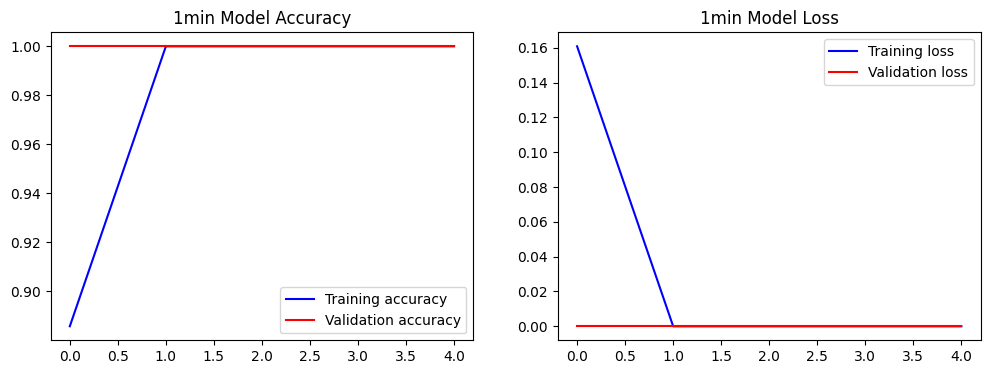

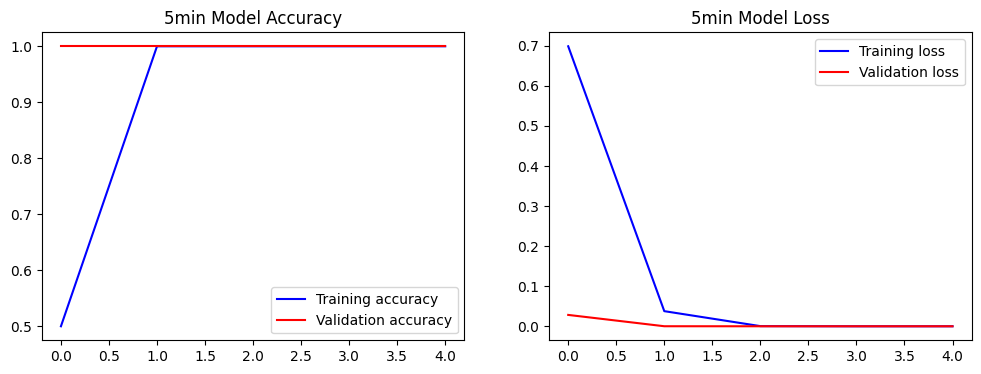

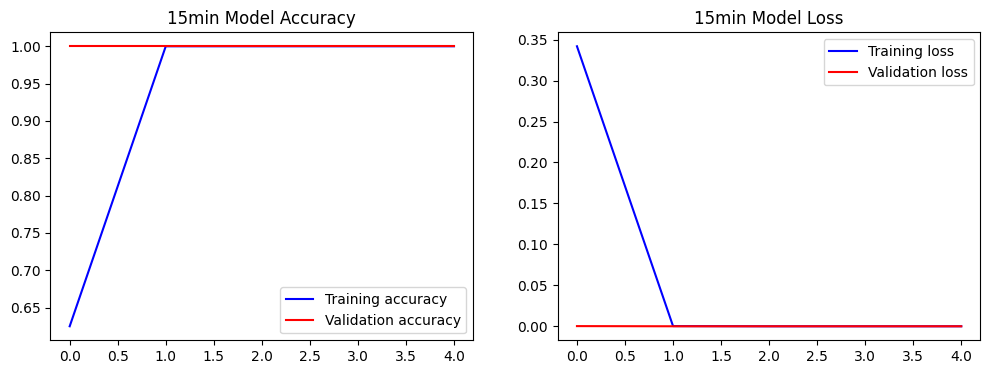

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# --- Step 1: Data Loading from Google Drive Folders ---

base_path = '/content/drive/MyDrive/candeldata/'  # Path to your dataset

# Ensure the correct folder structure
os.makedirs(base_path + '1min', exist_ok=True)
os.makedirs(base_path + '5min', exist_ok=True)
os.makedirs(base_path + '15min', exist_ok=True)

# Image size
IMG_SIZE = (128, 128)

# Create data generator for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load images from 1min, 5min, and 15min directories
train_gen_1min = datagen.flow_from_directory(base_path + '1min', target_size=IMG_SIZE, subset='training', batch_size=32, class_mode='binary')
val_gen_1min = datagen.flow_from_directory(base_path + '1min', target_size=IMG_SIZE, subset='validation', batch_size=32, class_mode='binary')

train_gen_5min = datagen.flow_from_directory(base_path + '5min', target_size=IMG_SIZE, subset='training', batch_size=32, class_mode='binary')
val_gen_5min = datagen.flow_from_directory(base_path + '5min', target_size=IMG_SIZE, subset='validation', batch_size=32, class_mode='binary')

train_gen_15min = datagen.flow_from_directory(base_path + '15min', target_size=IMG_SIZE, subset='training', batch_size=32, class_mode='binary')
val_gen_15min = datagen.flow_from_directory(base_path + '15min', target_size=IMG_SIZE, subset='validation', batch_size=32, class_mode='binary')

# --- Step 2: Define CNN Model ---
def create_cnn_model(input_shape):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))

    # Dropout layer
    model.add(Dropout(0.5))

    # Output layer (since it's binary classification)
    model.add(Dense(1, activation='sigmoid'))

    return model

# Input shape for the images (128x128 with 3 color channels)
input_shape = (128, 128, 3)

# Create the models for 1min, 5min, and 15min data
model_1min = create_cnn_model(input_shape)
model_5min = create_cnn_model(input_shape)
model_15min = create_cnn_model(input_shape)

# --- Step 3: Compile the Models ---
# Since it's binary classification, use 'binary_crossentropy'
model_1min.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_5min.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_15min.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 4: Train the Models ---

# Train the model for 1min data
history_1min = model_1min.fit(train_gen_1min, validation_data=val_gen_1min, epochs=5)

# Train the model for 5min data
history_5min = model_5min.fit(train_gen_5min, validation_data=val_gen_5min, epochs=5)

# Train the model for 15min data
history_15min = model_15min.fit(train_gen_15min, validation_data=val_gen_15min, epochs=5)

# --- Step 5: Evaluate the Models ---

# Evaluate 1min model on validation data
val_loss_1min, val_acc_1min = model_1min.evaluate(val_gen_1min)
print(f"1min Model - Validation Loss: {val_loss_1min}, Validation Accuracy: {val_acc_1min}")

# Evaluate 5min model on validation data
val_loss_5min, val_acc_5min = model_5min.evaluate(val_gen_5min)
print(f"5min Model - Validation Loss: {val_loss_5min}, Validation Accuracy: {val_acc_5min}")

# Evaluate 15min model on validation data
val_loss_15min, val_acc_15min = model_15min.evaluate(val_gen_15min)
print(f"15min Model - Validation Loss: {val_loss_15min}, Validation Accuracy: {val_acc_15min}")

# --- Step 6: Visualize Training History ---

# Function to plot training and validation accuracy/loss
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.show()

# Plot for each model
plot_history(history_1min, '1min Model')
plot_history(history_5min, '5min Model')
plot_history(history_15min, '15min Model')


In [ ]:
# --- Step 5: Evaluate the Models ---

# Evaluate 1min model on validation data
val_loss_1min, val_acc_1min = model_1min.evaluate(val_gen_1min)
print(f"1min Model - Validation Loss: {val_loss_1min:.3f}, Validation Accuracy: {val_acc_1min * 100:.2f}%")

# Evaluate 5min model on validation data
val_loss_5min, val_acc_5min = model_5min.evaluate(val_gen_5min)
print(f"5min Model - Validation Loss: {val_loss_5min:.3f}, Validation Accuracy: {val_acc_5min * 100:.2f}%")

# Evaluate 15min model on validation data
val_loss_15min, val_acc_15min = model_15min.evaluate(val_gen_15min)
print(f"15min Model - Validation Loss: {val_loss_15min:.3f}, Validation Accuracy: {val_acc_15min * 100:.2f}%")



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
1min Model - Validation Loss: 0.000, Validation Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 1.8661e-14
5min Model - Validation Loss: 0.000, Validation Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 1.0000 - loss: 2.6742e-26
15min Model - Validation Loss: 0.000, Validation Accuracy: 100.00%


In [1]:
import os
from skimage import io, color, feature
import numpy as np

# Define the base directory where your image folders are located
base_dir = '/content/drive/MyDrive/candeldata'

# List the subfolders (e.g., '15min', '1min', '5min') containing images
folders = ['15min', '1min', '5min']

# Initialize a list to store the features for each image
image_features = []

# Iterate through each folder
for folder in folders:
    folder_path = os.path.join(base_dir, folder)

    # List all PNG files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Process each image in the folder
    for image_file in image_files:
        # Build the full image path
        image_path = os.path.join(folder_path, image_file)

        # Load the image
        img = io.imread(image_path)

        # Convert to grayscale
        gray_img = color.rgb2gray(img)

        # Extract edge features using Canny edge detection
        edges = feature.canny(gray_img)

        # Flatten the edge features to create a feature vector
        feature_vector = edges.flatten()

        # Append the feature vector along with the folder and image name (for identification)
        image_features.append({
            'folder': folder,
            'image_file': image_file,
            'features': feature_vector
        })

# At this point, image_features contains the extracted features for all images in all folders
# You can now use these features for training a machine learning model

# Example: Convert the list of features to a NumPy array for easier manipulation
features_array = np.array([item['features'] for item in image_features])

# Now you can use `features_array` as the input data for your machine learning model



In [2]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the neural network model (Q-network)
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Replay buffer to store experiences
class ReplayBuffer:
    def __init__(self, max_size=10000):
        self.buffer = deque(maxlen=max_size)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        batch = [self.buffer[i] for i in indices]
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def size(self):
        return len(self.buffer)

# DQN agent
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.q_network = DQN(state_dim, action_dim)
        self.target_network = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=0.001)
        self.loss_fn = nn.MSELoss()
        self.replay_buffer = ReplayBuffer()
        self.gamma = 0.99  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.update_target_steps = 1000
        self.steps = 0

    def select_action(self, state):
        """Epsilon-greedy action selection."""
        if random.random() < self.epsilon:
            return random.randint(0, self.action_dim - 1)  # Random action
        else:
            state = torch.FloatTensor(state).unsqueeze(0)  # Convert state to tensor
            q_values = self.q_network(state)
            return torch.argmax(q_values).item()  # Choose action with highest Q-value

    def train(self):
        """Train the Q-network with experiences from the replay buffer."""
        if self.replay_buffer.size() < self.batch_size:
            return  # Not enough experience to train

        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)

        # Convert to tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        # Q-values of the current states
        q_values = self.q_network(states)
        current_q = q_values.gather(1, actions.unsqueeze(1)).squeeze(1)

        # Q-values of the next states (using target network)
        next_q_values = self.target_network(next_states)
        max_next_q = next_q_values.max(1)[0]
        expected_q = rewards + (1 - dones) * self.gamma * max_next_q

        # Compute loss and update the Q-network
        loss = self.loss_fn(current_q, expected_q.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Update the target network every few steps
        if self.steps % self.update_target_steps == 0:
            self.target_network.load_state_dict(self.q_network.state_dict())

    def add_experience(self, state, action, reward, next_state, done):
        self.replay_buffer.add((state, action, reward, next_state, done))

    def update_epsilon(self):
        """Decrease epsilon for exploration-exploitation tradeoff."""
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# Main loop to run the DQN algorithm
if __name__ == "__main__":
    env = gym.make("CartPole-v1")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    agent = DQNAgent(state_dim, action_dim)
    episodes = 500
    max_steps_per_episode = 500

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        for step in range(max_steps_per_episode):
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)

            agent.add_experience(state, action, reward, next_state, done)
            agent.train()

            state = next_state
            total_reward += reward

            if done:
                break

        # Decrease epsilon for exploration-exploitation tradeoff
        agent.update_epsilon()

        print(f"Episode {episode + 1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon}")

    env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1, Total Reward: 62.0, Epsilon: 0.995
Episode 2, Total Reward: 11.0, Epsilon: 0.990025
Episode 3, Total Reward: 17.0, Epsilon: 0.985074875
Episode 4, Total Reward: 19.0, Epsilon: 0.9801495006250001
Episode 5, Total Reward: 18.0, Epsilon: 0.9752487531218751
Episode 6, Total Reward: 31.0, Epsilon: 0.9703725093562657
Episode 7, Total Reward: 21.0, Epsilon: 0.9655206468094844
Episode 8, Total Reward: 29.0, Epsilon: 0.960693043575437
Episode 9, Total Reward: 21.0, Epsilon: 0.9558895783575597
Episode 10, Total Reward: 9.0, Epsilon: 0.9511101304657719
Episode 11, Total Reward: 24.0, Epsilon: 0.946354579813443
Episode 12, Total Reward: 28.0, Epsilon: 0.9416228069143757
Episode 13, Total Reward: 34.0, Epsilon: 0.9369146928798039
Episode 14, Total Reward: 18.0, Epsilon: 0.9322301194154049
Episode 15, Total Reward: 19.0, Epsilon: 0.9275689688183278
Episode 16, Total Reward: 17.0, Epsilon: 0.9229311239742362
Episode 17, Total Reward: 11.0, Epsilon: 0.918316468354365
Episode 18, Total Rewar

In [3]:
import numpy as np

# Function to detect upward or downward trends
def detect_trend(data):
    """
    Detect upward or downward trends based on price changes.
    Returns 'up' for upward trends, 'down' for downward trends.
    """
    return np.where(np.diff(data) > 0, 'up', 'down')

# Function to detect a simple moving average crossover (bullish/bearish)
def moving_average_crossover(data, short_window=3, long_window=5):
    """
    Detects moving average crossovers (bullish/bearish).
    - Bullish crossover: short-term moving average crosses above the long-term.
    - Bearish crossover: short-term moving average crosses below the long-term.
    """
    short_ma = np.convolve(data, np.ones(short_window)/short_window, mode='valid')
    long_ma = np.convolve(data, np.ones(long_window)/long_window, mode='valid')

    # Compare short MA and long MA to detect crossovers
    signals = np.where(short_ma[-len(long_ma):] > long_ma, 'bullish', 'bearish')
    return signals

# Function to detect a bullish or bearish engulfing pattern (simplified version)
def detect_engulfing_pattern(data):
    """
    Detects bullish or bearish engulfing candlestick patterns.
    - Bullish engulfing: Downtrend followed by a larger up-candle.
    - Bearish engulfing: Uptrend followed by a larger down-candle.
    """
    pattern = []
    for i in range(1, len(data) - 1):
        if data[i-1] > data[i] and data[i+1] > data[i]:
            pattern.append('bullish_engulfing')
        elif data[i-1] < data[i] and data[i+1] < data[i]:
            pattern.append('bearish_engulfing')
        else:
            pattern.append('no_pattern')
    return pattern

# Example price data (representing closing prices of a stock)
prices = [100, 102, 101, 105, 108, 107, 109, 111, 110, 112]

# Detect trends (upward or downward)
trend = detect_trend(prices)
print("Trend Detection:")
print(trend)

# Detect moving average crossover signals
ma_signals = moving_average_crossover(prices, short_window=3, long_window=5)
print("\nMoving Average Crossover Detection:")
print(ma_signals)

# Detect engulfing patterns
engulfing_patterns = detect_engulfing_pattern(prices)
print("\nBullish/Bearish Engulfing Pattern Detection:")
print(engulfing_patterns)


Trend Detection:
['up' 'down' 'up' 'up' 'down' 'up' 'up' 'down' 'up']

Moving Average Crossover Detection:
['bullish' 'bullish' 'bullish' 'bullish' 'bullish' 'bullish']

Bullish/Bearish Engulfing Pattern Detection:
['bearish_engulfing', 'bullish_engulfing', 'no_pattern', 'bearish_engulfing', 'bullish_engulfing', 'no_pattern', 'bearish_engulfing', 'bullish_engulfing']


In [5]:
!pip install deap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.2 MB/s eta 0:00:00


In [6]:
# Step 0: Install DEAP if not already installed
!pip install deap

# Import necessary modules from DEAP and Python's standard library
from deap import base, creator, tools, algorithms
import random

# Step 1: Define the Individual and Fitness function
# The FitnessMax maximizes the objective (weights=(1.0,)).
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# The Individual is a list of attributes with a corresponding fitness score
creator.create("Individual", list, fitness=creator.FitnessMax)

# Step 2: Define the population, crossover, mutation, and selection
toolbox = base.Toolbox()
# Attribute generator: Generate a random float in the range [0.0, 1.0)
toolbox.register("attr_float", random.random)
# Structure initializers: Define an individual (a list of 5 random floats)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
# Define the population as a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 3: Define the fitness function (the goal is to maximize the sum of the individual's values)
def evaluate(individual):
    return sum(individual),  # Return a tuple (sum of individual values)

# Step 4: Register the GA operations
toolbox.register("evaluate", evaluate)  # Fitness function
toolbox.register("mate", tools.cxTwoPoint)  # Crossover method: two-point crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Mutation method: flip a bit with probability 0.05
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection method: tournament selection

# Step 5: Set up the Genetic Algorithm process
# Generate the initial population of 100 individuals
population = toolbox.population(n=100)

# Step 6: Evolve the population using the genetic algorithm
# Run the genetic algorithm for 40 generations
# cxpb = crossover probability, mutpb = mutation probability
result_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=True)

# Step 7: Extract and display the best individual from the final population
best_individual = tools.selBest(result_population, 1)[0]
print(f"\nBest individual is: {best_individual}")
print(f"Fitness: {evaluate(best_individual)[0]}")


gen	nevals
0  	100   
1  	70    
2  	58    
3  	52    
4  	68    
5  	68    
6  	56    
7  	64    
8  	54    
9  	57    
10 	65    
11 	67    
12 	59    
13 	62    
14 	54    
15 	57    
16 	67    
17 	67    
18 	52    
19 	53    
20 	52    
21 	68    
22 	73    
23 	61    
24 	55    
25 	69    
26 	61    
27 	56    
28 	64    
29 	60    
30 	61    
31 	61    
32 	57    
33 	63    
34 	48    
35 	54    
36 	52    
37 	57    
38 	58    
39 	55    
40 	70    

Best individual is: [0.9759081486933143, 0.941449406394192, 0.9850816400087302, 0.9368052576396936, 0.9881588290140938]
Fitness: 4.827403281750024


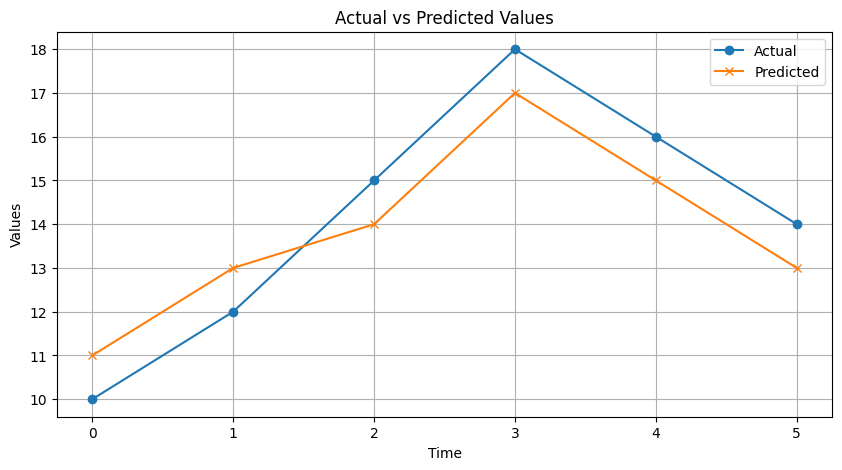

In [7]:
import matplotlib.pyplot as plt

# Example data for predictions
actual = [10, 12, 15, 18, 16, 14]       # Actual values
predicted = [11, 13, 14, 17, 15, 13]    # Predicted values

# Create a new figure for plotting
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot actual vs predicted values
plt.plot(actual, label="Actual", marker='o')        # Actual values with markers
plt.plot(predicted, label="Predicted", marker='x')  # Predicted values with different markers

# Add titles and labels
plt.title("Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Values")

# Add a legend to differentiate actual and predicted values
plt.legend()

# Add a grid for better readability
plt.grid()

# Show the plot
plt.show()


In [8]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a sample dataset (Iris dataset in this example)
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual models
clf1 = RandomForestClassifier(random_state=42)  # Random Forest model
clf2 = LogisticRegression(max_iter=200)          # Logistic Regression model
clf3 = SVC(probability=True, random_state=42)    # Support Vector Classifier model

# Create the ensemble model using Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', clf1),
    ('lr', clf2),
    ('svc', clf3)
], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Calculate and print the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model accuracy: {accuracy:.2f}")


Ensemble model accuracy: 1.00


In [9]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Step 2: Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,               # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.2,           # Randomly translate images horizontally (20% of total width)
    height_shift_range=0.2,          # Randomly translate images vertically (20% of total height)
    shear_range=0.2,                 # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,                  # Randomly zoom into images (20% of the image)
    horizontal_flip=True,            # Randomly flip images horizontally
    fill_mode='nearest'              # Fill in newly created pixels after a transformation
)

# Step 3: Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Fit the model using the data generator
# Use datagen.flow to augment images during training
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
 

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 62ms/step - accuracy: 0.3093 - loss: 1.8683 - val_accuracy: 0.4885 - val_loss: 1.3924
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.4558 - loss: 1.5092 - val_accuracy: 0.5214 - val_loss: 1.3064
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.5086 - loss: 1.3790 - val_accuracy: 0.6003 - val_loss: 1.1269
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.5378 - loss: 1.2927 - val_accuracy: 0.6205 - val_loss: 1.0610
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.5555 - loss: 1.2473 - val_accuracy: 0.6191 - val_loss: 1.0827
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.5721 - loss: 1.1995 - val_accuracy: 0.6330 - val_loss: 1.0380
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5777 - loss: 1.1830 - val_accuracy: 0.6553 - val_loss: 0.9789
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.5904 - loss:

In [10]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Step 1: Load your dataset
# For demonstration, let's create a synthetic dataset (replace this with your dataset)
# Assuming you have images of shape (128, 128, 3) and binary labels
num_samples = 1000
X = np.random.rand(num_samples, 128, 128, 3)  # Random images
y = np.random.randint(0, 2, num_samples)      # Random binary labels

# Step 2: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 4: Load the VGG16 pre-trained model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Step 5: Add custom layers on top of the base model
x = Flatten()(base_model.output)  # Flatten the output of the base model
x = Dense(128, activation='relu')(x)  # Add a dense layer with 128 units
predictions = Dense(1, activation='sigmoid')(x)  # Add an output layer for binary classification

# Step 6: Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Use learning_rate instead of lr

# Step 8: Fit the model using the data generator
# Use datagen.flow for data augmentation during training
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=10)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 549s 22s/step - accuracy: 0.4603 - loss: 0.7167 - val_accuracy: 0.5250 - val_loss: 0.6920
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 564s 22s/step - accuracy: 0.4758 - loss: 0.6970 - val_accuracy: 0.4750 - val_loss: 0.6978
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 544s 22s/step - accuracy: 0.4844 - loss: 0.6968 - val_accuracy: 0.4750 - val_loss: 0.7074
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 543s 22s/step - accuracy: 0.4807 - loss: 0.7009 - val_accuracy: 0.4750 - val_loss: 0.7096
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 557s 22s/step - accuracy: 0.5086 - loss: 0.6973 - val_accuracy: 0.5250 - val_loss: 0.6929
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 539s 22s/step - accuracy: 0.5159 - loss: 0.6939 - val_accuracy: 0.4800 - val_loss: 0.6932
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 533s 21s/step - accuracy: 0.4823 - loss: 0.6936 - val_accuracy: 0.5250 - val_loss: 0.6927
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 567s 22s/step -

In [11]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification

# Step 1: Load or create your dataset
# For demonstration, let's create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the model
model = RandomForestClassifier()

# Step 4: Set up the hyperparameter grid
params = {
    'n_estimators': [50, 100],     # Number of trees in the forest
    'max_depth': [10, 20, None]    # Maximum depth of the tree
}

# Step 5: Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)  # 5-fold cross-validation

# Step 6: Fit the model using grid search
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score:", best_score)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Best Cross-validation Score: 0.89375


In [12]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Step 1: Load or create your dataset
# For demonstration, let's create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Step 6: Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.89
Precision: 0.95
Recall: 0.84
F1 Score: 0.89
Confusion Matrix:
 [[88  5]
 [17 90]]


In [13]:
import shutil

# Define the name of the ZIP file and the folder to be zipped
zip_filename = 'fix.ipynb'
folder_to_zip = 'fix.ipynb'  # Replace with your folder name

# Create a ZIP file from the folder
shutil.make_archive(zip_filename[:-4], 'zip', folder_to_zip)

print(f'Created {zip_filename} successfully.')


Created fix.ipynb successfully.
